In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (24, 16)

In [20]:
def to_oersted(data):
    return data/79.9 + 3019

In [21]:
directory = 'Diff_I'
files = os.listdir(directory)

for i in range(len(files)):
    tmp_df = pd.read_table(directory + '/' +files[i])
    tmp_df = tmp_df.reset_index(drop=False)
    tmp_df.columns = ['field', 'intensity']
    tmp_df['field'] = to_oersted(tmp_df['field'])
    plt.plot(tmp_df['field'], tmp_df['intensity'],label=files[i][:-8])
    
plt.title('Спектр ДФПГ для разных токов')
plt.xlabel(r'$H$, Oersted')
plt.ylabel(r'Intensity, a.u.')
plt.legend()
plt.savefig('pic/DFPG_DIFF_I.png', format='png', dpi=500)
plt.close()

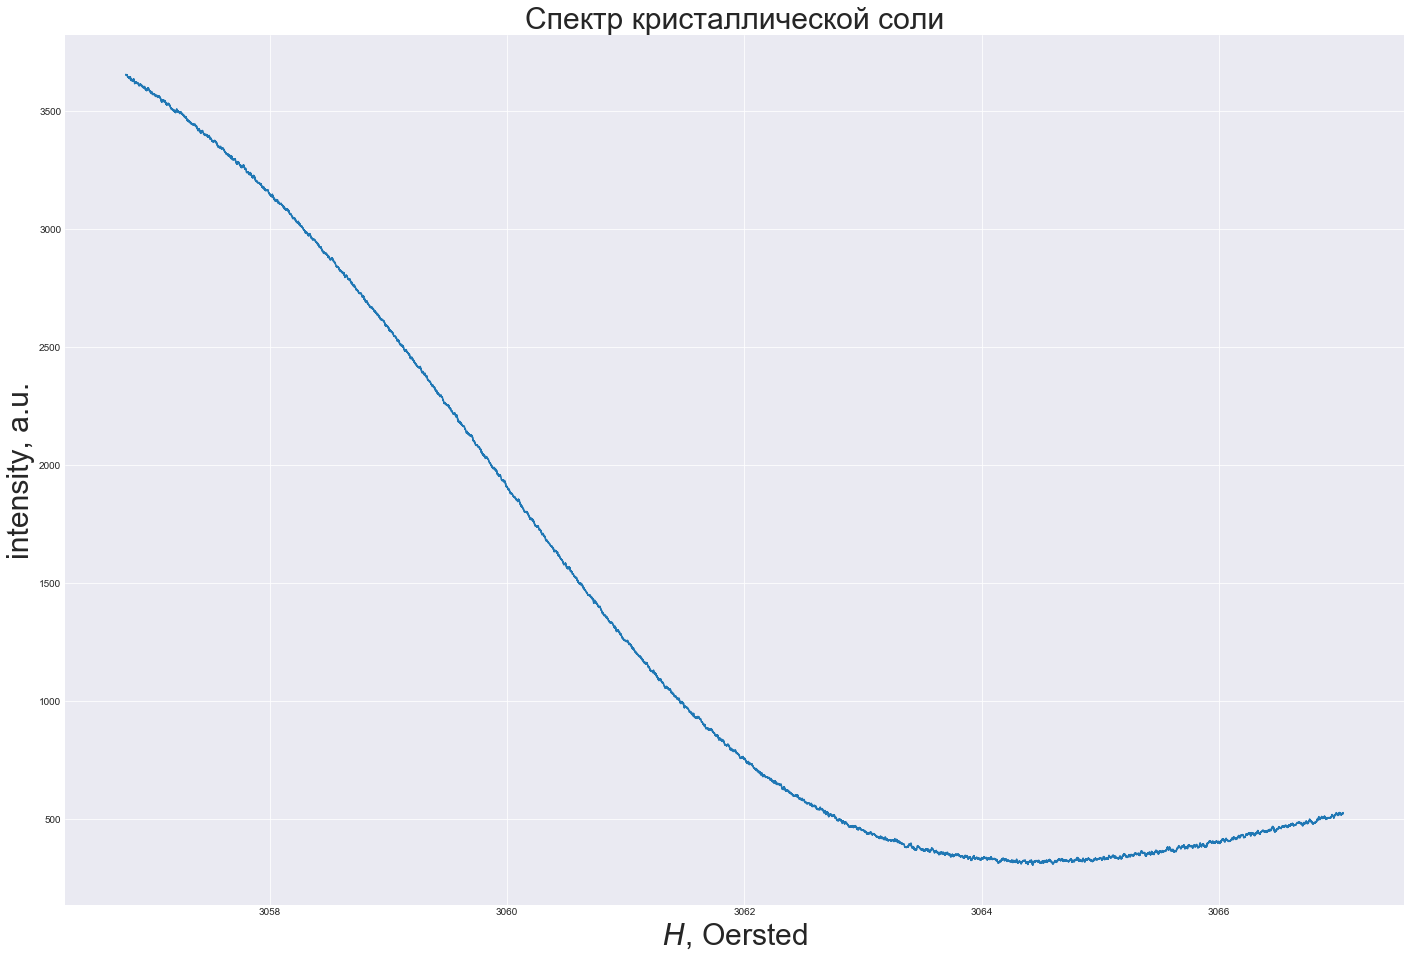

In [22]:
crystal_df = pd.read_table('Crystal/3_kristal_Mn.epr.txt')
crystal_df = crystal_df.reset_index(drop=False)
crystal_df.columns = ['field', 'intensity']
crystal_df['field'] = to_oersted(crystal_df['field'])

plt.plot(crystal_df['field'], crystal_df['intensity'])
plt.title(r'Спектр кристаллической соли', fontsize=30)
plt.xlabel(r'$H$, Oersted', fontsize=30)
plt.ylabel(r'intensity, a.u.', fontsize=30)
plt.savefig('pic/CRYSTAL.png', format='png', dpi=500)

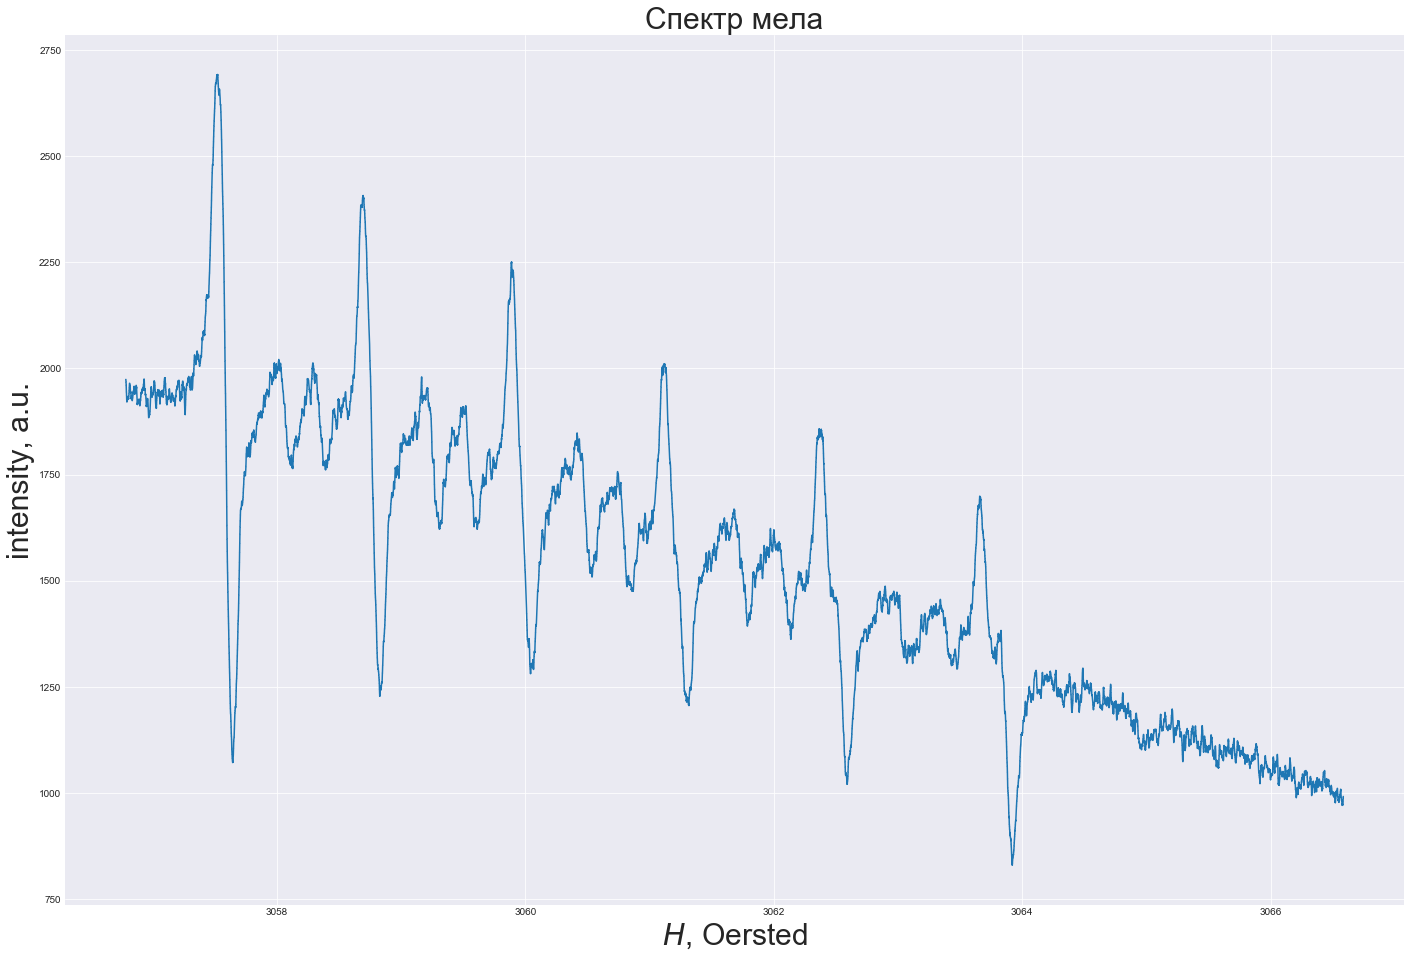

In [23]:
MEL_df = pd.read_table('Crystal/3_mel.epr.txt')
MEL_df = MEL_df.reset_index(drop=False)
MEL_df.columns = ['field', 'intensity']
MEL_df['field'] = to_oersted(MEL_df['field'])

plt.plot(MEL_df['field'], MEL_df['intensity'])
plt.title(r'Спектр мела', fontsize=30)
plt.xlabel(r'$H$, Oersted', fontsize=30)
plt.ylabel(r'intensity, a.u.', fontsize=30)
plt.savefig('pic/MEL.png', format='png', dpi=500)

In [24]:
MEL_FIELD_diff, MEL_INTENSITY_diff = MEL_df['field'][15::15], np.diff(to_oersted(MEL_df['intensity'][::15]))

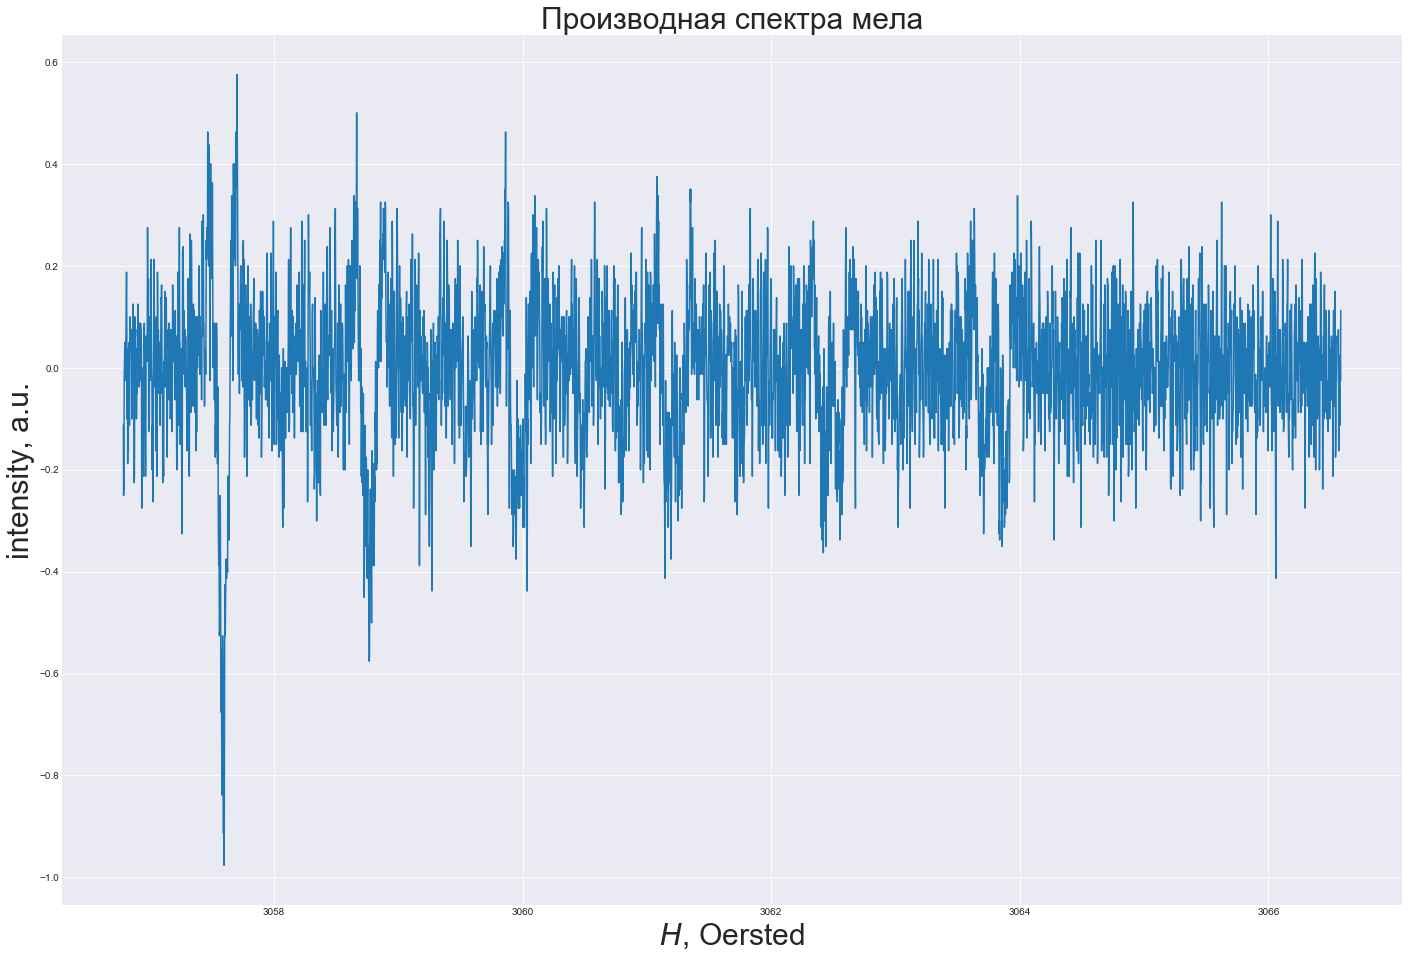

In [25]:
plt.plot(MEL_FIELD_diff, MEL_INTENSITY_diff)
plt.title(r'Производная спектра мела', fontsize=30)
plt.xlabel(r'$H$, Oersted', fontsize=30)
plt.ylabel(r'intensity, a.u.', fontsize=30)
plt.savefig('pic/MEL_DIFF.png', format='png', dpi=500)

In [26]:
directory = 'DIELECTRIC_LOSS'
files = os.listdir(directory)
names = ['капилляр', 'пробирка концентрация', 'пробирка уровень']
plt.style.use('ggplot')

for i in range(len(files)):
    tmp_df = pd.read_table(directory + '/' +files[i])
    tmp_df = tmp_df.reset_index(drop=False)
    tmp_df.columns = ['field', 'intensity']
    tmp_df['field'] = to_oersted(tmp_df['field'])
    plt.plot(tmp_df['field'], tmp_df['intensity'],label=names[i])
    
plt.title('Спектры при разных диэлектрических потерях')
plt.xlabel(r'$H$, Oersted')
plt.ylabel(r'Intensity, a.u.')
plt.legend()
plt.savefig('pic/DIELECTRIC_LOSS.png', format='png', dpi=500)
plt.close()

In [3]:
directory = 'excel_files'
files = os.listdir(directory)

In [14]:
tmp_df = pd.read_excel(str(directory)+'/'+str(files[0]), skiprows=0)

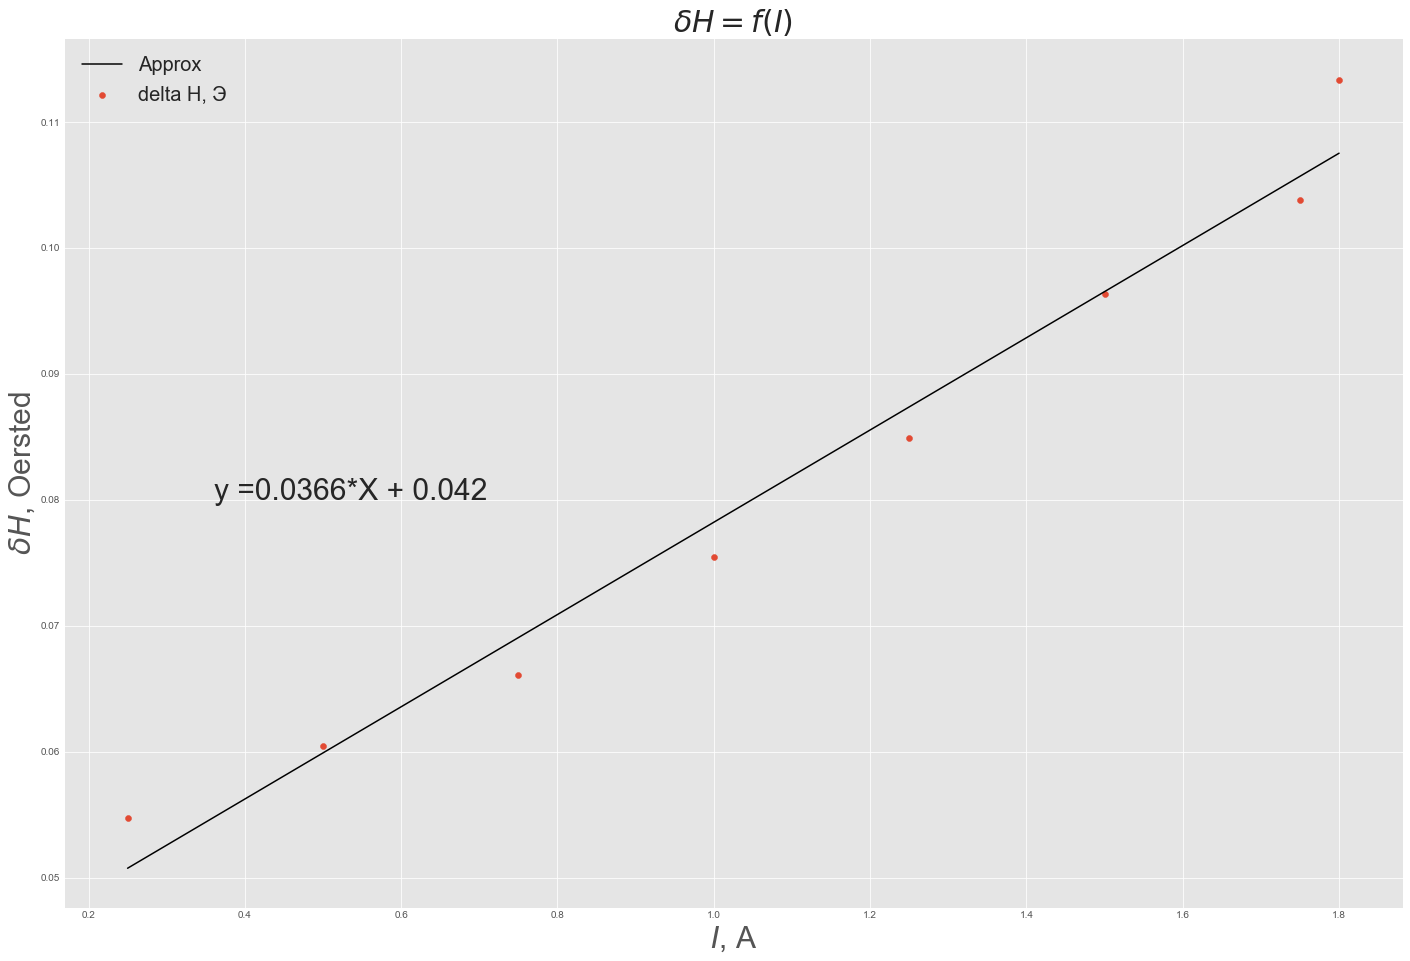

In [29]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

directory = 'excel_files'
files = os.listdir(directory)


p = np.polyfit(tmp_df['I, A'], tmp_df['delta H, Э'], 1)
yp = np.polyval(p, tmp_df['I, A'])


plt.plot(tmp_df['I, A'], yp, 'k', label='Approx')
plt.scatter(tmp_df['I, A'], tmp_df['delta H, Э'])

plt.title(r'$\delta H = f(I)$', fontsize=30)
plt.xlabel(r'$I$, A', fontsize=30)
plt.ylabel(r'$\delta H$, Oersted', fontsize=30)
plt.legend(fontsize=20)
plt.text(0.36, 0.08, 'y ='+str(toFixed(p[0], 4))+'*X + ' + str(toFixed(p[1], 3)), fontsize=30)
plt.savefig('pic/DELTA_FOR_I.png', format='png', dpi=500)


In [30]:
tmp_df = pd.read_excel(directory + '/' +files[1])
tmp_df = tmp_df.drop(6)
tmp_df = tmp_df.drop(5)

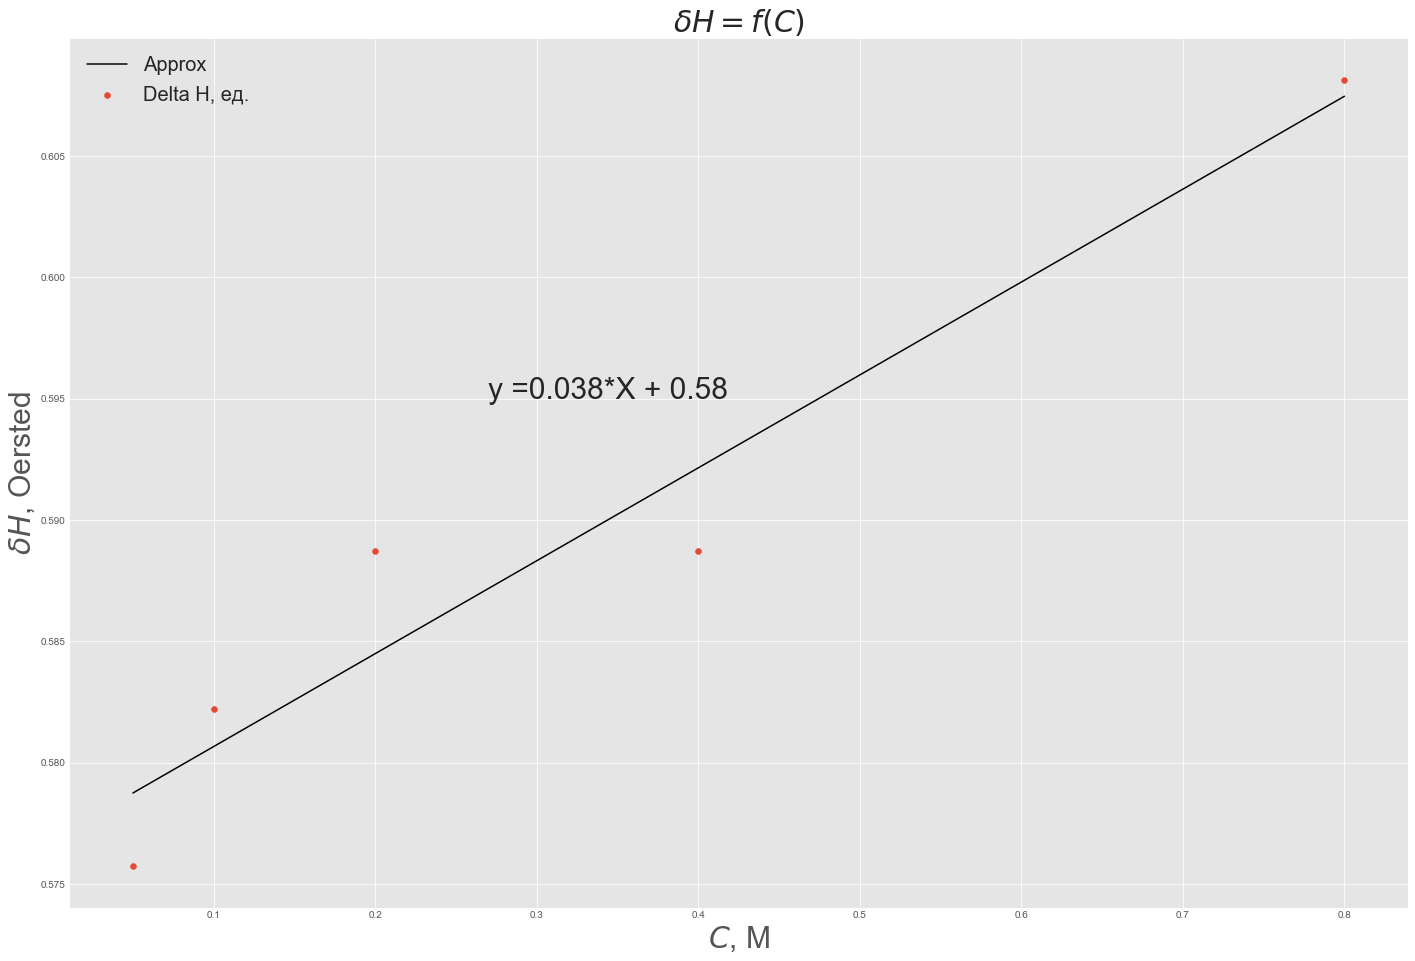

In [31]:
p = np.polyfit(tmp_df['C, M'], tmp_df['Delta H, ед.'], 1)
yp = np.polyval(p, tmp_df['C, M'])

plt.plot(tmp_df['C, M'], yp, 'k', label='Approx')
plt.scatter(tmp_df['C, M'], tmp_df['Delta H, ед.'])

plt.title(r'$\delta H = f(C)$', fontsize=30)
plt.xlabel(r'$C$, M', fontsize=30)
plt.ylabel(r'$\delta H$, Oersted', fontsize=30)
plt.legend(fontsize=20)
plt.text(0.27, 0.595, 'y ='+str(toFixed(p[0], 3))+'*X + ' + str(toFixed(p[1], 2)), fontsize=30)
plt.savefig('pic/DELTA_FOR_C.png', format='png', dpi=500)


In [16]:
tmp_df = pd.read_excel(directory + '/' +files[1])

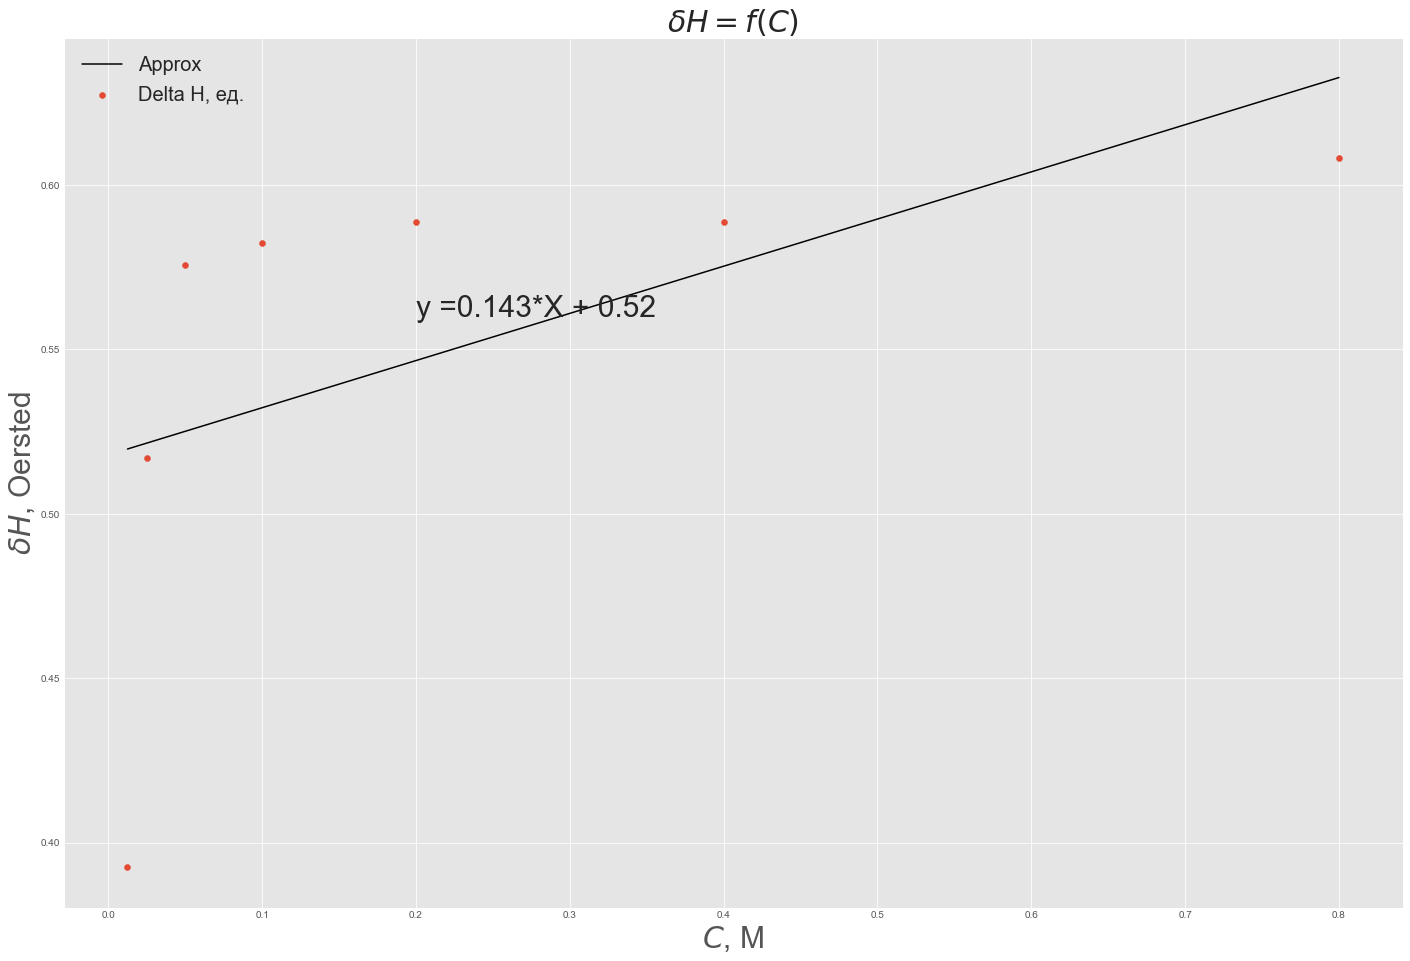

In [33]:
p = np.polyfit(tmp_df['C, M'], tmp_df['Delta H, ед.'], 1)
yp = np.polyval(p, tmp_df['C, M'])

plt.plot(tmp_df['C, M'], yp, 'k', label='Approx')
plt.scatter(tmp_df['C, M'], tmp_df['Delta H, ед.'])

plt.title(r'$\delta H = f(C)$', fontsize=30)
plt.xlabel(r'$C$, M', fontsize=30)
plt.ylabel(r'$\delta H$, Oersted', fontsize=30)
plt.legend(fontsize=20)
plt.text(0.2, 0.56, 'y ='+str(toFixed(p[0], 3))+'*X + ' + str(toFixed(p[1], 2)), fontsize=30)
plt.savefig('pic/DELTA_FOR_C_full.png', format='png', dpi=500)

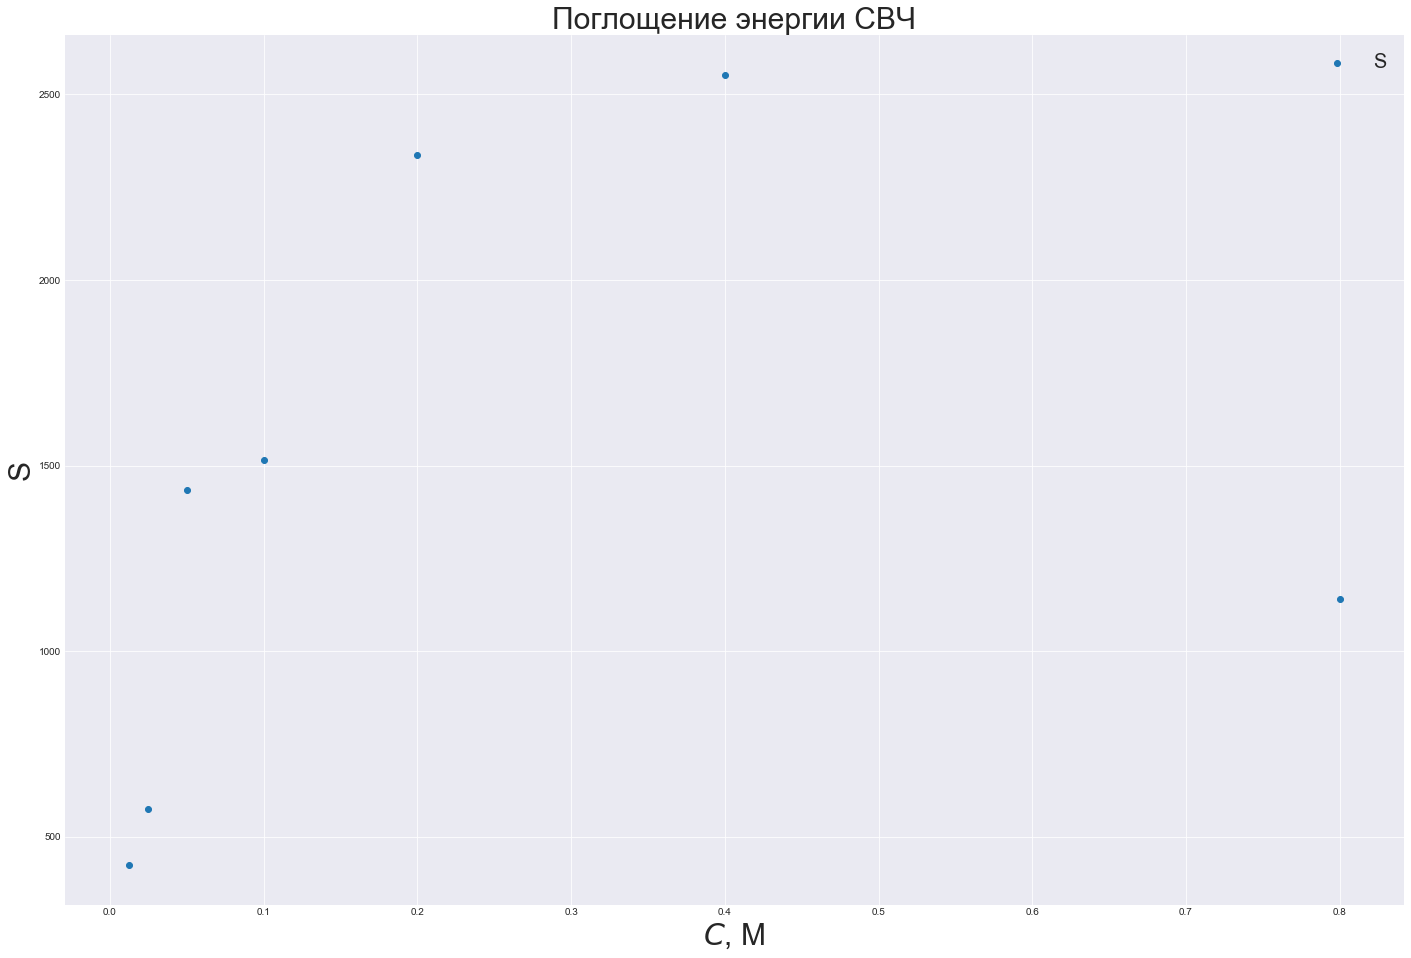

In [12]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

directory = 'excel_files'
files = os.listdir(directory)

plt.scatter(tmp_df['C, M'], tmp_df['S'])

plt.title(r'Поглощение энергии СВЧ', fontsize=30)
plt.xlabel(r'$C$, M', fontsize=30)
plt.ylabel(r'S', fontsize=30)
plt.legend(fontsize=20)
#plt.text(0.36, 0.08, 'y ='+str(toFixed(p[0], 4))+'*X + ' + str(toFixed(p[1], 3)), fontsize=30)
plt.savefig('pic/S-absorb.png', format='png', dpi=500)


In [17]:
tmp_df

,"C, M",Unnamed: 1,"Delta H, ед.",sq_Delta H max,Y' max,S
0,0.8000,0.1033,0.608132,1.067089,1067.50,1139.117507
1,0.4000,0.1000,0.588705,1.000000,2553.75,2553.750000
2,0.2000,0.1000,0.588705,1.000000,2337.50,2337.500000
3,0.1000,0.0989,0.582229,0.978121,1550.00,1516.087550
4,0.0500,0.0978,0.575754,0.956484,1500.00,1434.726000
5,0.0250,0.0878,0.516883,0.770884,743.75,573.344975
6,0.0125,0.0667,0.392666,0.444889,950.40,422.822506
